<a href="https://colab.research.google.com/github/GIBSONGODSAN/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import mailbox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
mbox_file_path = '/content/drive/MyDrive/Takeout/All mail Including Spam and Trash.mbox'

In [ ]:
mbox = mailbox.mbox(mbox_file_path)

In [ ]:
email_data = []

for message in mbox:
    sender = message['from']
    subject = message['subject']
    date = message['date']
    body = message.get_payload()

    email_data.append({'Sender': sender, 'Subject': subject, 'Date': date, 'Body': body})

df = pd.DataFrame(email_data)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

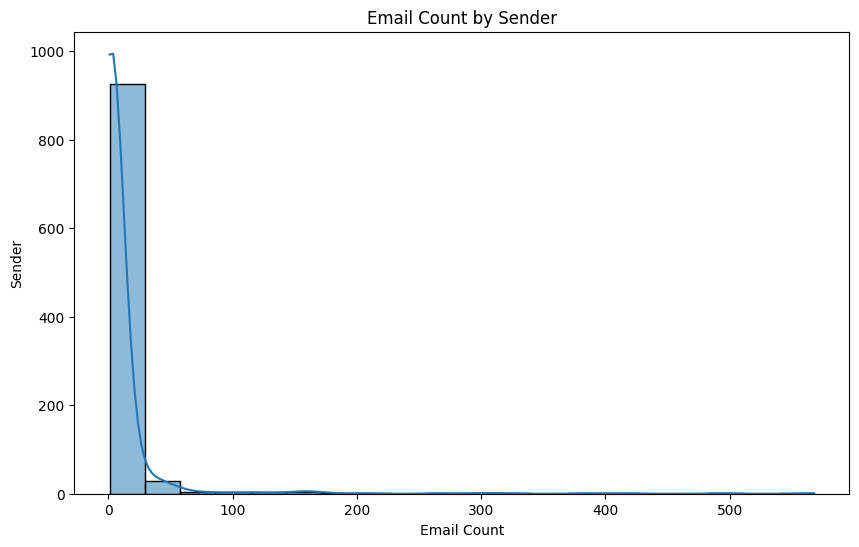

In [ ]:
sender_counts = df['Sender'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(sender_counts, bins=20, kde=True)
plt.xlabel('Email Count')
plt.ylabel('Sender')
plt.title('Email Count by Sender')
plt.show()

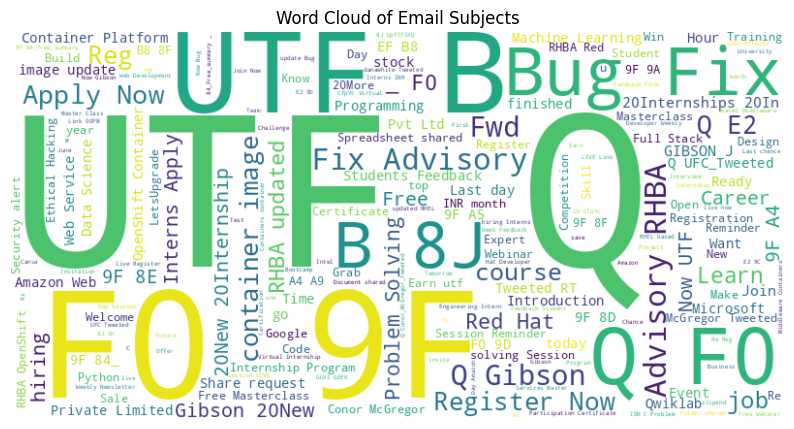

In [ ]:
from wordcloud import WordCloud

subject_text = ' '.join(df['Subject'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Subjects')
plt.show()

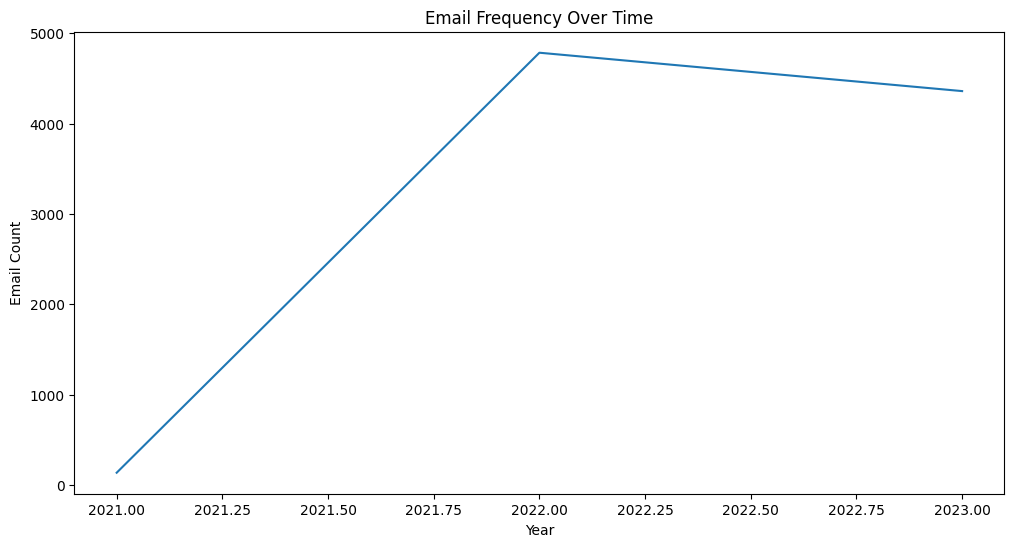

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

# Visualize the Data - Email Frequency Over Time
df['Date'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Email Count')
plt.title('Email Frequency Over Time')
plt.show()

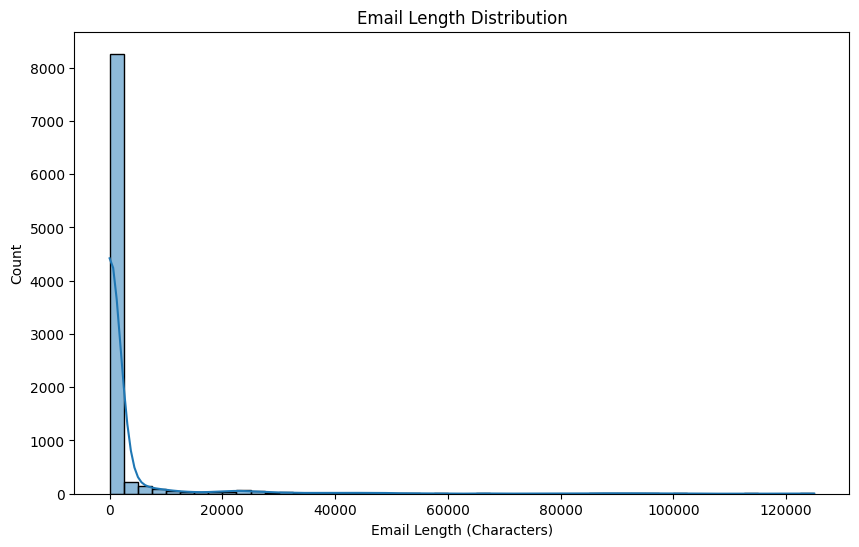

In [ ]:
df['Email Length'] = df['Body'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Email Length'], bins=50, kde=True)
plt.xlabel('Email Length (Characters)')
plt.ylabel('Count')
plt.title('Email Length Distribution')
plt.show()